**Implementing Course 1 using Tensorflow:**

In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.layers.Dense(10))

2.19.0
<Dense name=dense, built=False>


* Building model using TensorFlow

In [39]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

np.random.seed(42)
tf.random.set_seed(42)

x = np.array([[200.0, 17.0]])
layer_1 = Dense(units=4, activation ='sigmoid')
a1 = layer_1(x)
layer_2 = Dense(units=1, activation='sigmoid')
a2 = layer_2(a1)
if a2 >= 0.5:
    y_hat = 1
else:
    y_hat = 0

print(y_hat)

1


* Data in tensorflow

In [45]:
x = np.array([[200.0, 17.0]])
layer_1 = Dense(units=3, activation='sigmoid')
a_1 = layer_1(x)
print(a1)
print(a1.numpy())

tf.Tensor([[2.5168018e-22 0.0000000e+00 0.0000000e+00 0.0000000e+00]], shape=(1, 4), dtype=float32)
[[2.5168018e-22 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


* Importing libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input # type: ignore
from tensorflow.keras import Sequential # type: ignore
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy # type: ignore
from tensorflow.keras.activations import sigmoid # type: ignore
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

* House price price using tf

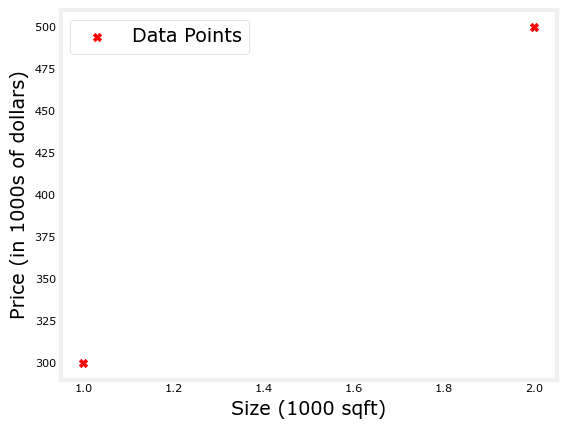

In [47]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)
fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='X', c='r', label='Data Points')
ax.legend(fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [48]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')
linear_layer.get_weights()

[]

In [52]:
print(X_train[0].reshape(1,1))
print(X_train[0])

[[1.]]
[1.]


In [54]:
a1 = linear_layer(X_train[0].reshape(1,1))

In [56]:
w, b = linear_layer.get_weights()
print(f"w : {w}, b: {b}")

w : [[1.62]], b: [0.]


In [59]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [60]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [61]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b
print(prediction_tf)
print(prediction_np)
print(Y_train)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)
[[300.]
 [500.]]
[[300.]
 [500.]]


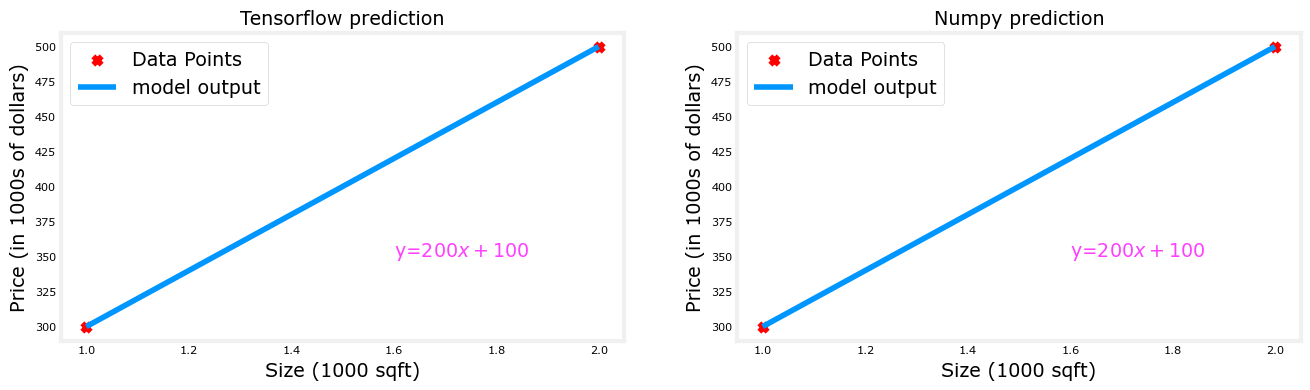

In [62]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

In [63]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

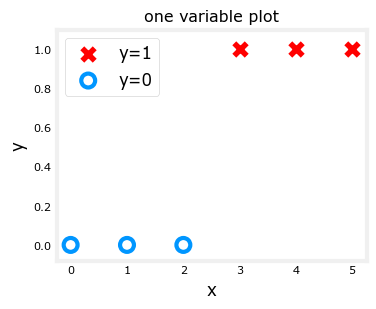

In [64]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [66]:
model = Sequential(
    [
        Dense(units=1, input_dim=1, activation = 'sigmoid', name='L1')
    ]
)

c:\Users\Hridoy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [68]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)
print(logistic_layer)

[[1.38]] [0.]
(1, 1) (1,)
<Dense name=L1, built=True>


In [69]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [70]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.01]]
[[0.01]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━

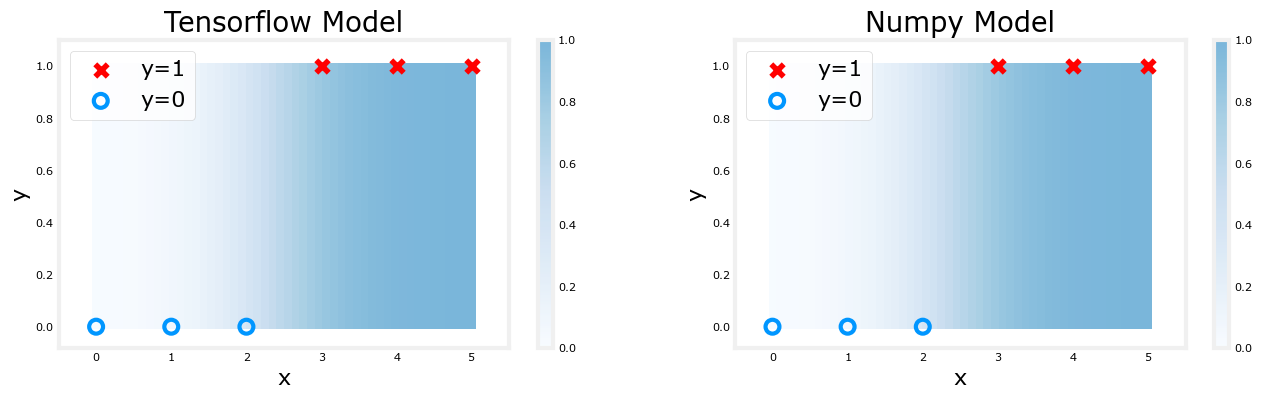

In [71]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)